In [2]:
import glob
from gwpy.timeseries import TimeSeriesDict
from gwpy.timeseries import TimeSeries
from gwpy.segments import DataQualityFlag
from lalframe import utils

## DQ Flags and Channels

In [ ]:
# Data Quality Labels of science mode of the detectors
DQ_labels = {
    'H1':'H1:DMT-ANALYSIS_READY:1',
    'L1':'L1:DMT-ANALYSIS_READY:1',
    'V1':'V1:ITF_SCIENCE:1',
    'K1':'K1:GRD_SCIENCE_MODE:1',
}
# Channel names of the gwf files in kafka
H1_llhoft_chlist = [
    'H1:DMT-DQ_VECTOR',
    'H1:DMT-DQ_VECTOR_GATED',
    'H1:GDS-CALIB_F_CC',
    'H1:GDS-CALIB_F_CC_NOGATE',
    'H1:GDS-CALIB_F_S_SQUARED',
    'H1:GDS-CALIB_F_S_SQUARED_NOGATE',
    'H1:GDS-CALIB_KAPPA_C',
    'H1:GDS-CALIB_KAPPA_C_NOGATE',
    'H1:GDS-CALIB_KAPPA_PUM_IMAGINARY',
    'H1:GDS-CALIB_KAPPA_PUM_IMAGINARY_NOGATE',
    'H1:GDS-CALIB_KAPPA_PUM_REAL',
    'H1:GDS-CALIB_KAPPA_PUM_REAL_NOGATE',
    'H1:GDS-CALIB_KAPPA_TST_IMAGINARY',
    'H1:GDS-CALIB_KAPPA_TST_IMAGINARY_NOGATE',
    'H1:GDS-CALIB_KAPPA_TST_REAL',
    'H1:GDS-CALIB_KAPPA_TST_REAL_NOGATE',
    'H1:GDS-CALIB_KAPPA_UIM_IMAGINARY',
    'H1:GDS-CALIB_KAPPA_UIM_IMAGINARY_NOGATE',
    'H1:GDS-CALIB_KAPPA_UIM_REAL',
    'H1:GDS-CALIB_KAPPA_UIM_REAL_NOGATE',
    'H1:GDS-CALIB_SRC_Q_INVERSE',
    'H1:GDS-CALIB_SRC_Q_INVERSE_NOGATE',
    'H1:GDS-CALIB_STATE_VECTOR',
    'H1:GDS-CALIB_STRAIN',
    'H1:GDS-CALIB_STRAIN_CLEAN',
    'H1:GDS-CALIB_STRAIN_NOLINES',
    'H1:GDS-GATED_STRAIN',
    'H1:IDQ-EFF_OVL_10_2048',
    'H1:IDQ-FAP_OVL_10_2048',
    'H1:IDQ-LOGLIKE_OVL_10_2048',
    'H1:IDQ-OK_OVL_10_2048',
    'H1:IDQ-RANK_OVL_10_2048',
]
L1_llhoft_chlist = [
    'L1:DMT-DQ_VECTOR',
    'L1:DMT-DQ_VECTOR_GATED',
    'L1:GDS-CALIB_F_CC',
    'L1:GDS-CALIB_F_CC_NOGATE',
    'L1:GDS-CALIB_F_S_SQUARED',
    'L1:GDS-CALIB_F_S_SQUARED_NOGATE',
    'L1:GDS-CALIB_KAPPA_C',
    'L1:GDS-CALIB_KAPPA_C_NOGATE',
    'L1:GDS-CALIB_KAPPA_PUM_IMAGINARY',
    'L1:GDS-CALIB_KAPPA_PUM_IMAGINARY_NOGATE',
    'L1:GDS-CALIB_KAPPA_PUM_REAL',
    'L1:GDS-CALIB_KAPPA_PUM_REAL_NOGATE',
    'L1:GDS-CALIB_KAPPA_TST_IMAGINARY',
    'L1:GDS-CALIB_KAPPA_TST_IMAGINARY_NOGATE',
    'L1:GDS-CALIB_KAPPA_TST_REAL',
    'L1:GDS-CALIB_KAPPA_TST_REAL_NOGATE',
    'L1:GDS-CALIB_KAPPA_UIM_IMAGINARY',
    'L1:GDS-CALIB_KAPPA_UIM_IMAGINARY_NOGATE',
    'L1:GDS-CALIB_KAPPA_UIM_REAL',
    'L1:GDS-CALIB_KAPPA_UIM_REAL_NOGATE',
    'L1:GDS-CALIB_SRC_Q_INVERSE',
    'L1:GDS-CALIB_SRC_Q_INVERSE_NOGATE',
    'L1:GDS-CALIB_STATE_VECTOR',
    'L1:GDS-CALIB_STRAIN',
    'L1:GDS-CALIB_STRAIN_CLEAN',
    'L1:GDS-CALIB_STRAIN_NOLINES',
    'L1:GDS-GATED_STRAIN',
    'L1:IDQ-EFF_OVL_10_2048',
    'L1:IDQ-FAP_OVL_10_2048',
    'L1:IDQ-LOGLIKE_OVL_10_2048',
    'L1:IDQ-OK_OVL_10_2048',
    'L1:IDQ-RANK_OVL_10_2048',
]
K1_llhoft_chlist = [
    'K1:CAL-STATE_VECTOR_C00',
    'K1:CAL-STRAIN_C00',
    'K1:DET-DQ_STATE_VECTOR',
    'K1:GRD-IFO_STATE_N',
]
V1_llhoft_chlist = [
    'V1:DQ_ANALYSIS_STATE_VECTOR',
    'V1:Hrec_hoft_13684Hz'
]

# Bits used in the State Vector of the low-latency h(t)
HL_st_bits = [
    'HOFT_OK',
    'OBS_INTENT',
    'OBS_READY',
    'FILTERS_OK',
    'NO_GAP',
    'NO_STOCH_HW_INJ',
    'NO_CBC_HW_INJ',
    'NO_BURST_HW_INJ',
    'NO_DETCHAR_HW_INJ',
    'UNDISTURBED_OK',
    'KAPPA_TST_SMOOTH_OK',
    'KAPPA_PUM_SMOOTH_OK',
    'KAPPA_UIM_SMOOTH_OK',
    'KAPPA_C_SMOOTH_OK',
    'F_CC_SMOOTH_OK',
    'F_S_SQUARED_SMOOTH_OK',
    'F_S_OVER_Q_SMOOTH_OK',
    'LOWFREQ_LINE_SUBTR',
    'MIDFREQ_LINE_SUBTR',
    'LINE_SUBTR_GATE',
    'LINE_SUBTR_GATE',
    'NONSENS_SUBTR',
]
HL_dmt_dq_st_bits = [
    'ODD_PARITY',
    'DMT-OMC_DC_PD_ADC_OVERFLOW',
    'DMT-ETMY_ESD_DAC_OVERFLOW',
    'GATE_ACTIVE',
    'DMT-ETMX_ESD_DAC_OVERFLOW',
    'DMT-BLRMS_STRAIN_70_110',
    'DMT-BLRMS_STRAIN_25_50',
]
K1_st_bits = [
    'HOFT_OK',
    'NOT_USED',
    'SCIENCE_MODE',
    'NOT_USED',
    'NO_GAP',
    'NO_STOCH_HW_INJ',
    'NO_CBC_HW_INJ',
    'NO_BURST_HW_INJ',
    'NO_DETCHAR_HW_INJ',
    'NO_CW_INJ',
    'NO_UNPLANNED_HW_INJ',
]
K1_det_dq_st_bits = [
    'ODD_PARITY',
    'IFO_LOCKED',
    'NO_DIFFERENCES_ON_SDF',
    'SCIENCE_MODE',
    'OMC_DCPD_OVERFLOW',
    'ETMX_OVERFLOW',
    'ETMY_OVERFLOW',
    'NO_STOCH_HW_INJ',
    'NO_CBC_HW_INJ',
    'NO_BURST_HW_INJ',
    'NO_DET_HW_INJ',
    'NO_CW_HW_INJ',
    'NO_UNPLANNED_HW_INJ',
]
V1_st_bits = [
    'HOFT_OK',
    'SCIENCE_MODE',
    'OBS_READY',
    'CAL_FILTER_ SETTLED',
    'HOFT_PRODUCED_BY_CAL',
    'NO_STOCH_HW_INJ',
    'NO_CBC_HW_INJ',
    'NO_BURST_HW_INJ',
    'NO_DETCHAR_HW_INJ',
    'NO_CW_HW_INJ',
    'GOOD_DQ',
    'IFO_LOCKED',
]


## Find segments in science mode

In [3]:
IFO = 'H1'
start, end = 1368975618, 1371337218

segments = DataQualityFlag.query(f'{IFO}:DMT-ANALYSIS_READY:1', start, end)

In [5]:
segments.active

<SegmentList([Segment(1368979913.0, 1368992311.0)
              Segment(1368993005.0, 1368997896.0)
              Segment(1369184832.0, 1369184915.0)
              Segment(1369185055.0, 1369200465.0)
              Segment(1369205881.0, 1369230918.0)
              Segment(1369241742.0, 1369246564.0)
              Segment(1369254052.0, 1369255796.0)
              Segment(1369255991.0, 1369263774.0)
              Segment(1369276031.0, 1369292466.0)
              Segment(1369299302.0, 1369333565.0)
              Segment(1369375930.0, 1369381513.0)
              Segment(1369386030.0, 1369409817.0)
              Segment(1369411298.0, 1369413649.0)
              Segment(1369432797.0, 1369443373.0)
              Segment(1369450588.0, 1369470643.0)
              Segment(1369480556.0, 1369485043.0)
              Segment(1369492342.0, 1369493116.0)
              Segment(1369521579.0, 1369530570.0)
              Segment(1369545660.0, 1369555842.0)
              Segment(1369562361.0, 1369570422.0)


## Check Coherence

In [32]:
IFO = 'K1'
DATA_DIR = '/mnt/f/ll_data'
start, end = 1369291863, 1369291863 + 4096

strain_source = glob.glob(f'{DATA_DIR}/{IFO}_llhoft/*.gwf')
strain_source.sort()
wit_source = glob.glob(f'{DATA_DIR}/{IFO}_lldetchar/*.gwf')
wit_source.sort()
strain_ch = utils.get_channels(strain_source[0])[0]
wit_ch = utils.get_channels(wit_source[0])

strain = TimeSeries.read(
    strain_source,
    strain_ch,
    start=start,
    end=end
)

wit = TimeSeriesDict.read(
    wit_source,
    wit_ch,
    start=start,
    end=end
)

In [33]:
fftlength = 16
cohs = []
for i in range(len(wit_ch)):
    hoft = strain.resample(wit[wit_ch[i]].sample_rate)
    cohs.append(hoft.coherence(wit[wit_ch[i]], fftlength=fftlength, overlap=fftlength/2))

/home/jerry/miniconda3/envs/igwn-py39/lib/python3.9/site-packages/gwpy/plot/plot.py:279: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  super().show(warn=warn)
/home/jerry/miniconda3/envs/igwn-py39/lib/python3.9/site-packages/gwpy/plot/plot.py:279: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  super().show(warn=warn)
/home/jerry/miniconda3/envs/igwn-py39/lib/python3.9/site-packages/gwpy/plot/plot.py:279: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  super().show(warn=warn)
/home/jerry/miniconda3/envs/igwn-py39/lib/python3.9/site-packages/gwpy/plot/plot.py:279: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  

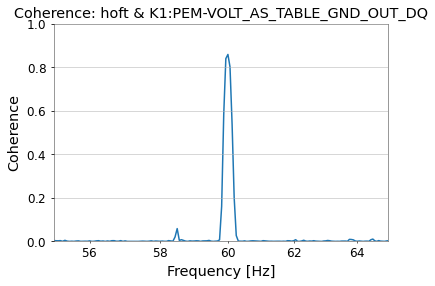

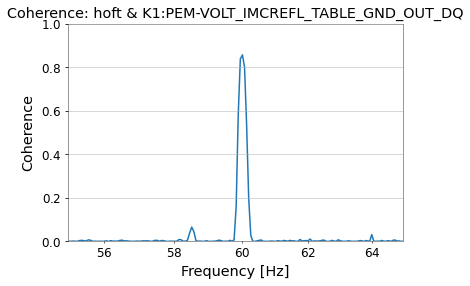

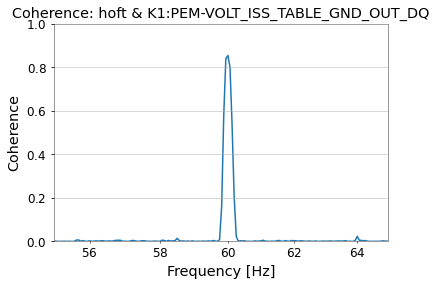

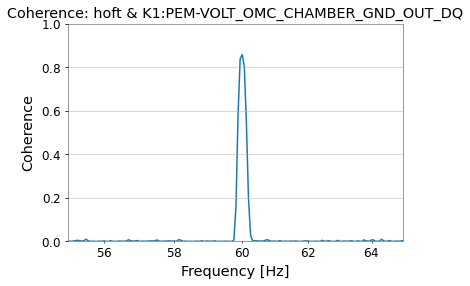

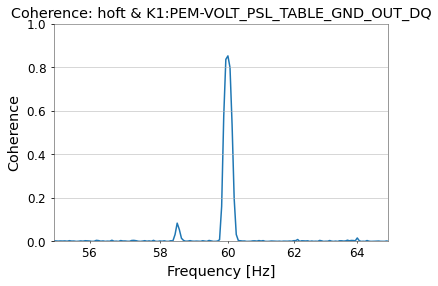

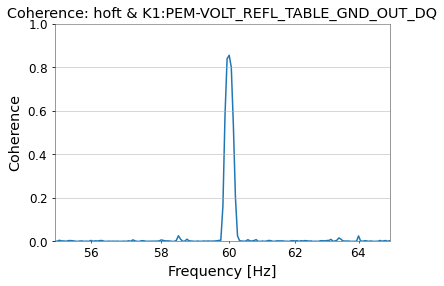

In [34]:
for i in range(len(wit_ch)):
    cohplot = cohs[i].plot(
        title=f'Coherence: hoft & {wit_ch[i]}',
        xlabel='Frequency [Hz]', xlim=[55,65],
        ylabel='Coherence', ylim=(0,1),
    )
    cohplot.show()